<a href="https://colab.research.google.com/github/vinicius-mattoso/Exploratory-Data-Analysis-EDA-/blob/main/Class%20Material/TendenciasMundiais_Edit_by_Vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tendências Mundiais

Aula ministrada pela professora Manoela Kohler ( https://www.linkedin.com/in/manoelakohler/ ), no curso de DataMining da ICA-PUC-Rio ( https://ica.puc-rio.ai/es/bi-master-es/ )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vinicius-mattoso/Exploratory-Data-Analysis-EDA-/main/Class%20Material/dataset/TendenciasMundiais.csv',sep=',')
df.head()

,CountryCode,CountryName,Region,FertilityRate.1960,LifeExp.1960,FertilityRate.2013,LifeExp.2013
0,ABW,Aruba,The Americas,4.820,65.569366,1.669,75.328659
1,AFG,Afghanistan,Asia,7.450,32.328512,5.050,60.028268
2,AGO,Angola,Africa,7.379,32.984829,6.165,51.866171
3,ALB,Albania,Europe,6.186,62.254366,1.771,77.537244
4,ARE,United Arab Emirates,Middle East,6.928,52.243220,1.801,77.195634


In [4]:
df.shape

(187, 7)

In [5]:
df.describe()

,FertilityRate.1960,LifeExp.1960,FertilityRate.2013,LifeExp.2013
count,187.000000,187.000000,187.000000,187.000000
mean,5.537112,53.734112,2.845543,70.763808
std,1.717305,12.182463,1.428171,8.590893
min,1.940000,28.211610,1.124000,48.937927
25%,4.311500,43.474451,1.770500,64.517354
50%,6.210000,54.699317,2.335000,73.250390
75%,6.806500,64.048244,3.790000,76.838622
max,8.187000,73.549756,7.623000,83.831707


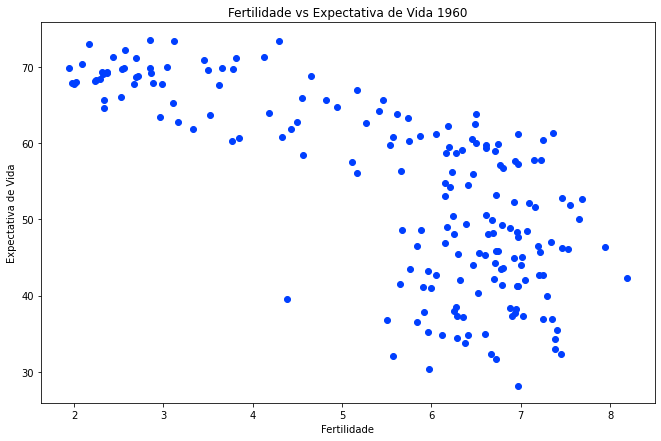

In [6]:
# gráfico de dispersão 1960
plt.figure(figsize=(11,7))
plt.scatter(x='FertilityRate.1960', y='LifeExp.1960', data=df)
plt.title('Fertilidade vs Expectativa de Vida 1960')
plt.xlabel('Fertilidade')
plt.ylabel('Expectativa de Vida')
plt.show()

In [7]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder().fit(df.Region)
region = enc.transform(df.Region)
print(df.Region.unique())
enc.transform(df.Region.unique())

['The Americas' 'Asia' 'Africa' 'Europe' 'Middle East' 'Oceania']


array([5, 1, 0, 2, 3, 4])

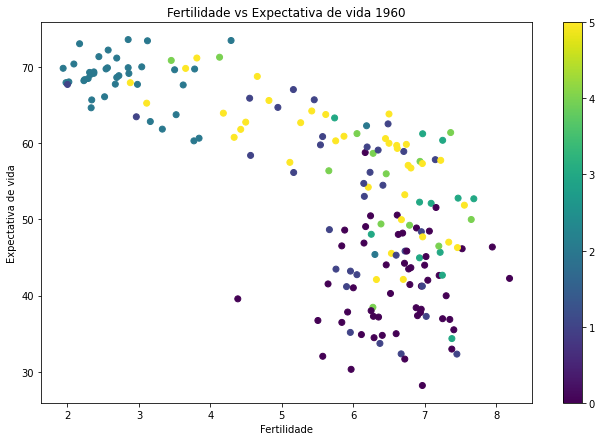

In [8]:
# Gráfico de dispersão 1960 - colorindo por região
plt.figure(figsize=(11,7))
plt.scatter(df['FertilityRate.1960'], df['LifeExp.1960'], c=region)
plt.colorbar()
plt.title('Fertilidade vs Expectativa de vida 1960')
plt.xlabel('Fertilidade')
plt.ylabel('Expectativa de vida')

plt.show()

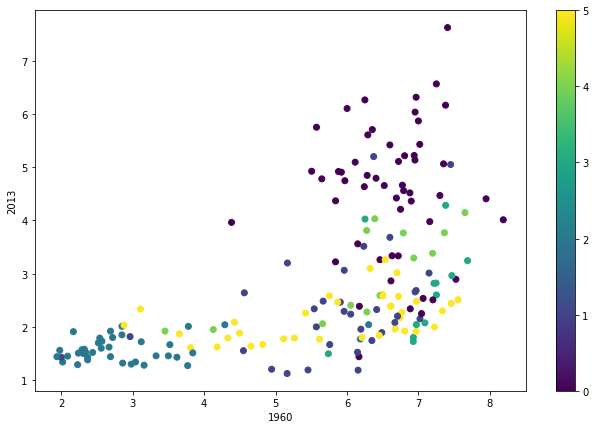

In [9]:
# Dispersão Fertilidade 1960 x 2013 - cor por  região
plt.figure(figsize=(11,7))
plt.scatter(df['FertilityRate.1960'], df['FertilityRate.2013'], c=region)
plt.colorbar()
plt.xlabel('1960')
plt.ylabel('2013')

plt.show()

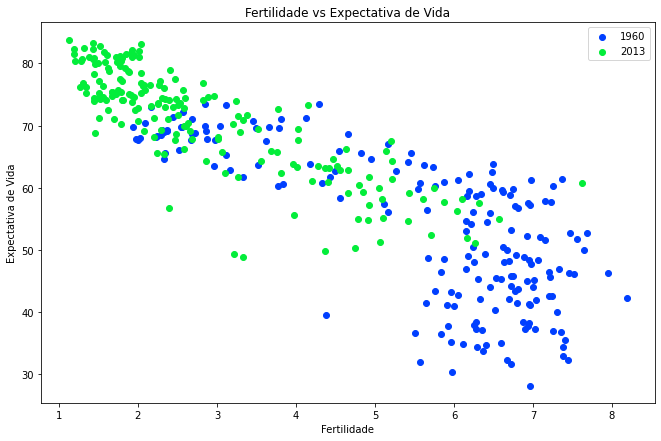

In [10]:
# gráfico de dispersão 1960 e 2013
plt.figure(figsize=(11,7))
plt.scatter(x='FertilityRate.1960', y='LifeExp.1960', data=df, label='1960')
plt.scatter(x='FertilityRate.2013', y='LifeExp.2013', data=df, label='2013')
plt.legend()
plt.title('Fertilidade vs Expectativa de Vida')
plt.xlabel('Fertilidade')
plt.ylabel('Expectativa de Vida')
plt.show()

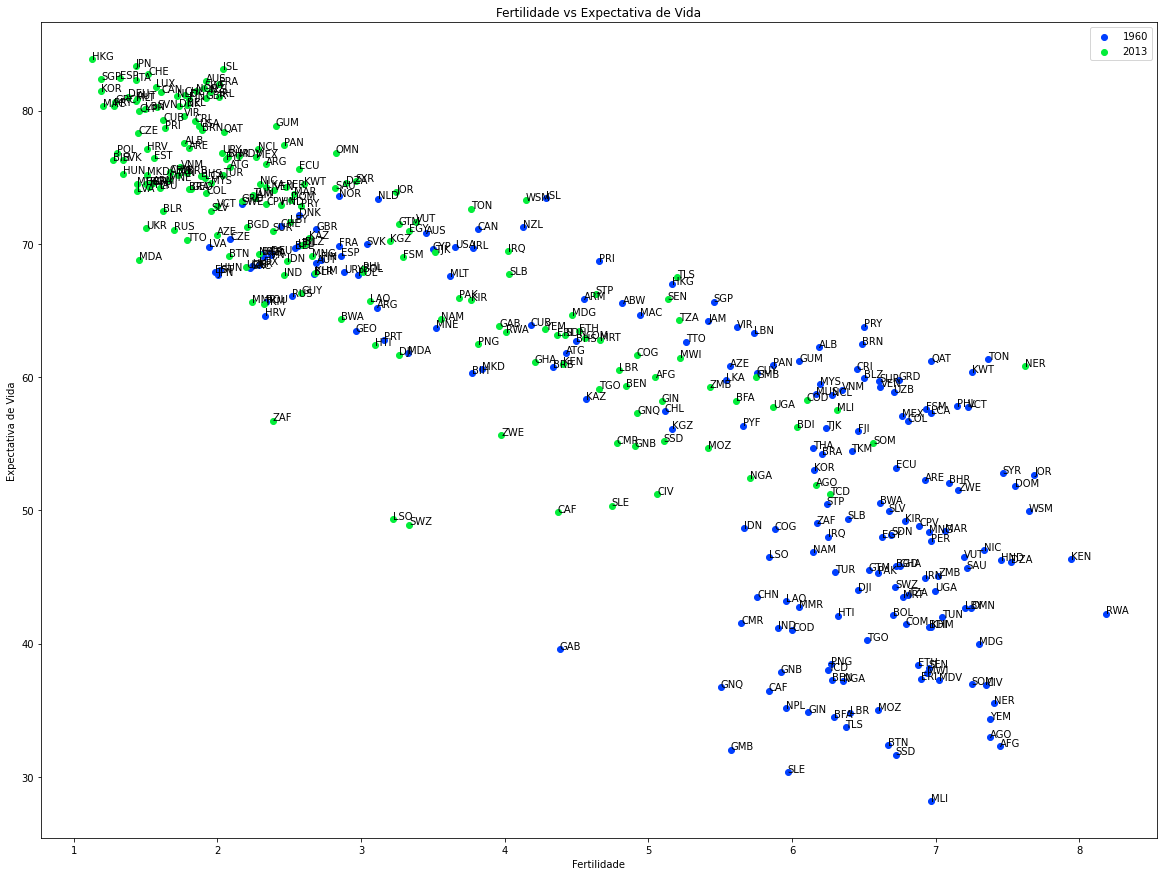

In [11]:
# gráfico de dispersão 
plt.figure(figsize=(20,15))
plt.scatter(x='FertilityRate.1960', y='LifeExp.1960', data=df, label='1960')
plt.scatter(x='FertilityRate.2013', y='LifeExp.2013', data=df, label='2013')
plt.legend()
plt.title('Fertilidade vs Expectativa de Vida')
plt.xlabel('Fertilidade')
plt.ylabel('Expectativa de Vida')

#colocar os códigos dos países
for i, cc in enumerate(df['CountryCode']):
  plt.annotate(cc, (df['FertilityRate.1960'][i], df['LifeExp.1960'][i]))
  plt.annotate(cc, (df['FertilityRate.2013'][i], df['LifeExp.2013'][i]))
plt.show()

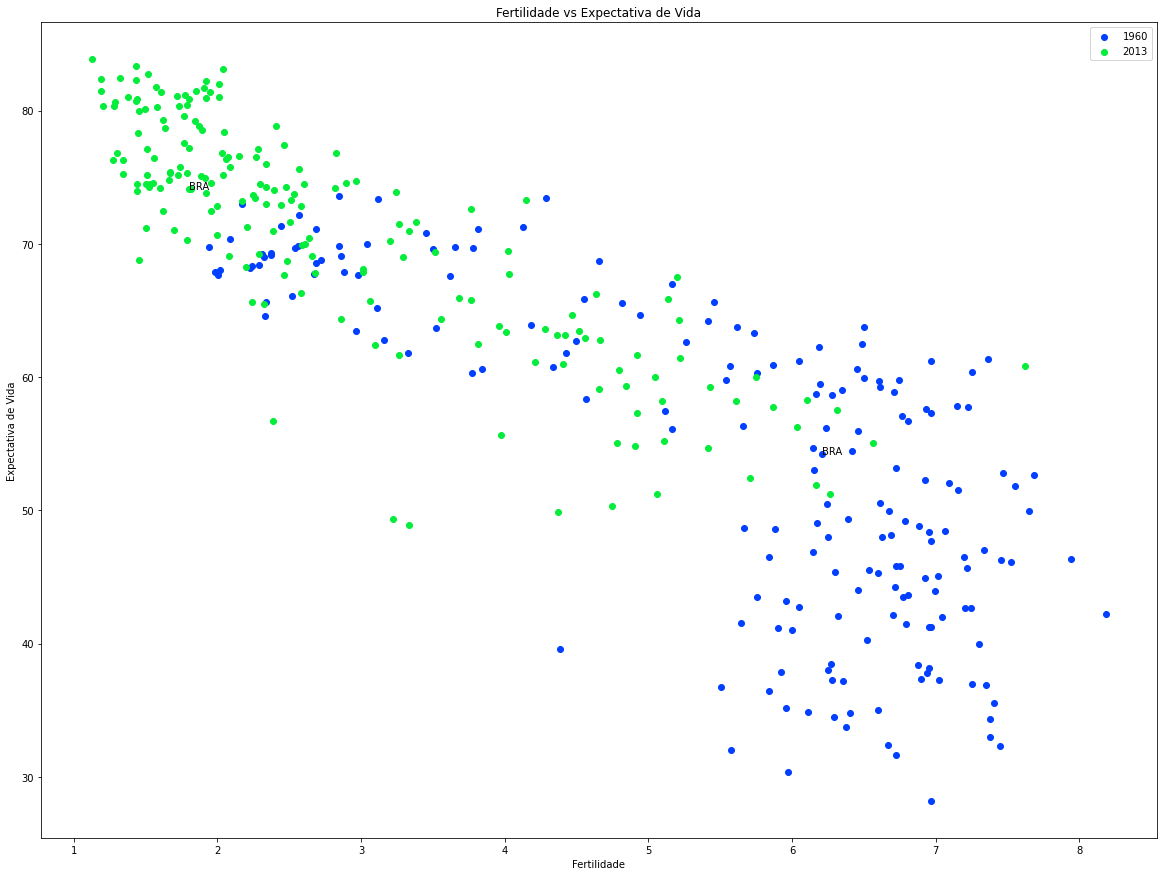

In [12]:
# gráfico de dispersão SÓ BRASIL
plt.figure(figsize=(20,15))
plt.scatter(x='FertilityRate.1960', y='LifeExp.1960', data=df, label='1960')
plt.scatter(x='FertilityRate.2013', y='LifeExp.2013', data=df, label='2013')
plt.legend()
plt.title('Fertilidade vs Expectativa de Vida')
plt.xlabel('Fertilidade')
plt.ylabel('Expectativa de Vida')

#colocar os códigos dos países
for i, cc in enumerate(df['CountryCode']):
  if cc == 'BRA':
    plt.annotate(cc, (df['FertilityRate.1960'][i], df['LifeExp.1960'][i]))
    plt.annotate(cc, (df['FertilityRate.2013'][i], df['LifeExp.2013'][i]))
plt.show()

In [13]:
df.Region.unique()

array(['The Americas', 'Asia', 'Africa', 'Europe', 'Middle East',
       'Oceania'], dtype=object)

In [14]:
df.Region.value_counts()

Africa          53
Europe          40
The Americas    36
Asia            33
Oceania         13
Middle East     12
Name: Region, dtype: int64

In [15]:
counts = df.Region.value_counts(sort=False)
counts

The Americas    36
Asia            33
Africa          53
Europe          40
Middle East     12
Oceania         13
Name: Region, dtype: int64

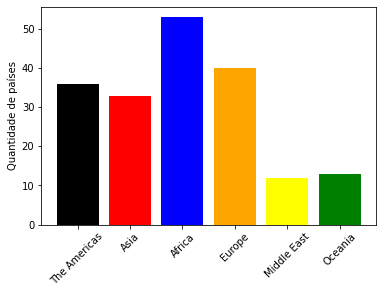

In [16]:
# graficos de barras
plt.bar(x=counts.index, height=df.Region.value_counts(sort=False), color=['black', 'red', 'blue', 'orange', 'yellow', 'green'] )
plt.ylabel('Quantidade de países')
plt.xticks(rotation='vertical')
plt.xticks(rotation=45)
plt.show()

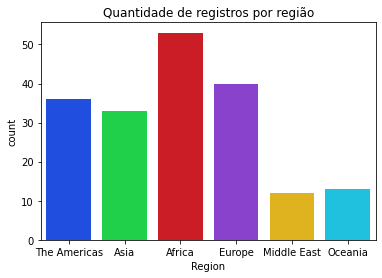

In [17]:
# o mesmo grafico
sns.countplot(data=df, x='Region')
plt.title('Quantidade de registros por região')
plt.show()

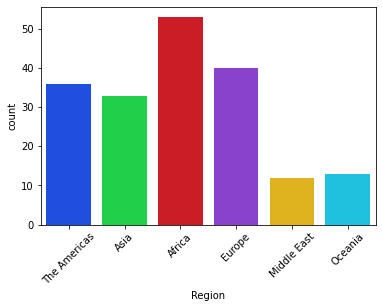

In [18]:
chart = sns.countplot(x='Region', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45); #rotacionar o labels

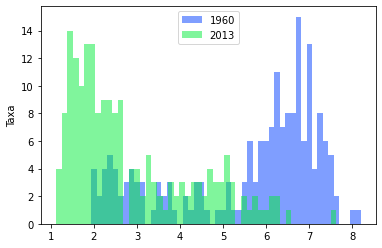

In [19]:
#histograma
plt.hist(df['FertilityRate.1960'], bins=50, alpha=0.5)
plt.hist(df['FertilityRate.2013'], bins=50, alpha=0.5)
plt.ylabel('Taxa')
plt.legend(['1960', '2013']);

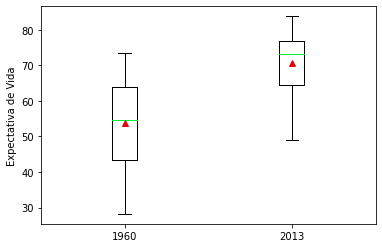

In [20]:
# boxplot
plt.boxplot([df['LifeExp.1960'], df['LifeExp.2013']], labels=['1960', '2013'], showmeans=True)
plt.ylabel('Expectativa de Vida')
plt.show()

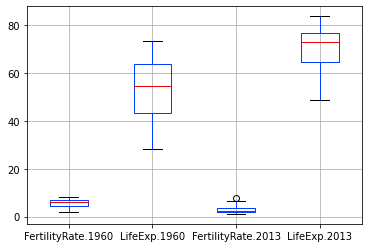

In [21]:
# direto do dataframe. todas as colunas numéricas
df.boxplot();

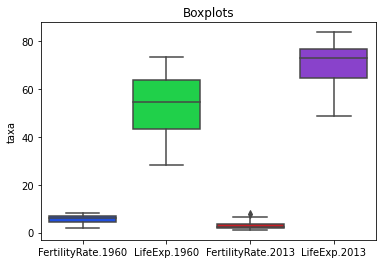

In [22]:
# seaborn todos as colunas numéricas
chart = sns.boxplot(data=df)
chart.set_title('Boxplots')
chart.set_ylabel('taxa');

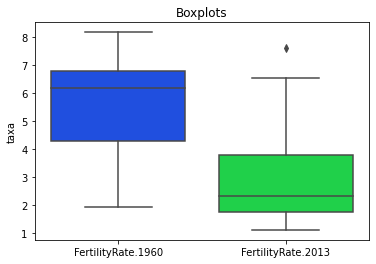

In [23]:
# só para fertilidade
chart = sns.boxplot(data=df[['FertilityRate.1960','FertilityRate.2013']])
chart.set_title('Boxplots')
chart.set_ylabel('taxa');

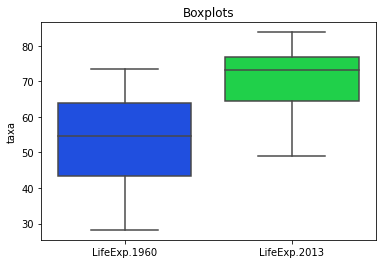

In [24]:
chart = sns.boxplot(data=df[['LifeExp.1960','LifeExp.2013']])
chart.set_title('Boxplots')
chart.set_ylabel('taxa');

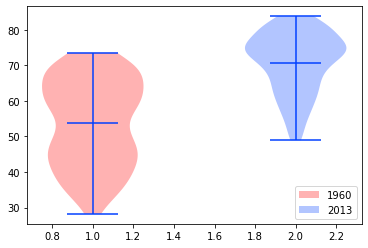

In [25]:
#violin plot
violin = plt.violinplot([df['LifeExp.1960'],df['LifeExp.2013']], showmeans=True);
violin['bodies'][0].set_facecolor('red')
plt.legend(['1960', '2013'], loc='lower right');

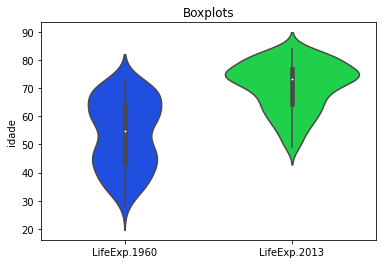

In [26]:
# o mesmo com seaborn
chart = sns.violinplot(data=df[['LifeExp.1960','LifeExp.2013']]);
chart.set_title('Boxplots')
chart.set_ylabel('idade');

In [27]:
#correlação
correlacao = df.corr()
correlacao

,FertilityRate.1960,LifeExp.1960,FertilityRate.2013,LifeExp.2013
FertilityRate.1960,1.000000,-0.731723,0.554141,-0.516687
LifeExp.1960,-0.731723,1.000000,-0.787129,0.797042
FertilityRate.2013,0.554141,-0.787129,1.000000,-0.836897
LifeExp.2013,-0.516687,0.797042,-0.836897,1.000000


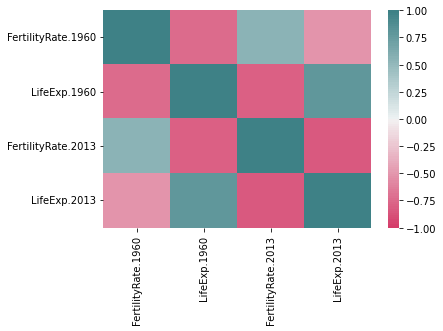

In [28]:
sns.heatmap(correlacao, vmin=-1, vmax=1, cmap=sns.diverging_palette(0,200, n=100));

In [29]:
df.corr().style.background_gradient(cmap='coolwarm')

,FertilityRate.1960,LifeExp.1960,FertilityRate.2013,LifeExp.2013
FertilityRate.1960,1.000000,-0.731723,0.554141,-0.516687
LifeExp.1960,-0.731723,1.000000,-0.787129,0.797042
FertilityRate.2013,0.554141,-0.787129,1.000000,-0.836897
LifeExp.2013,-0.516687,0.797042,-0.836897,1.000000
